In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

import pandas as pd

In [2]:
from steps.reader import PatchHistoryReader, ReleaseReader
from steps.filter import ChampionReleaseFilter

cr_dict = ReleaseReader('data/champions.csv').to_dict()
raw_df = PatchHistoryReader('data/patches.jsonl').to_df()
raw_df = ChampionReleaseFilter(cr_dict).transform(raw_df)
raw_df

,patch,date,champion,about,text
0,V12.5,2022-03-02,Ahri,Fox-Fire,Mana cost increased to 30 from 25.
1,V12.5,2022-03-02,Ahri,Fox-Fire,Base damage reduced to 50 / 75 / 100 / 125 / 1...
2,V12.5,2022-03-02,Ahri,Charm,Mana cost increased to 60 from 50.
3,V12.5,2022-03-02,Caitlyn,Piltover Peacemaker,Bug Fix: Now properly deals damage even if the...
4,V12.5,2022-03-02,Elise,General,Updated visual effects.
...,...,...,...,...,...
22437,"April 11, 2009 Patch",2009-04-11,Sivir,On the Hunt,Cooldown modified to 90 at all ranks from 120.
22438,"April 11, 2009 Patch",2009-04-11,Tristana,Rapid Fire,Now instant cast.
22439,"April 11, 2009 Patch",2009-04-11,Tristana,Buster Shot,Range increased to 700 from 600.
22440,"April 11, 2009 Patch",2009-04-11,Warwick,Hunter's Call,Now instant cast.


In [3]:
from steps.feature import ImpactClassifier
import joblib

model = joblib.load('model/impact_classifier.pickle')
df = ImpactClassifier(model).transform(raw_df)
df

,patch,date,champion,about,text,impact
0,V12.5,2022-03-02,Ahri,Fox-Fire,Mana cost increased to 30 from 25.,-1.0
1,V12.5,2022-03-02,Ahri,Fox-Fire,Base damage reduced to 50 / 75 / 100 / 125 / 1...,1.0
2,V12.5,2022-03-02,Ahri,Charm,Mana cost increased to 60 from 50.,-1.0
3,V12.5,2022-03-02,Caitlyn,Piltover Peacemaker,Bug Fix: Now properly deals damage even if the...,0.0
4,V12.5,2022-03-02,Elise,General,Updated visual effects.,0.0
...,...,...,...,...,...,...
22437,"April 11, 2009 Patch",2009-04-11,Sivir,On the Hunt,Cooldown modified to 90 at all ranks from 120.,-1.0
22438,"April 11, 2009 Patch",2009-04-11,Tristana,Rapid Fire,Now instant cast.,1.0
22439,"April 11, 2009 Patch",2009-04-11,Tristana,Buster Shot,Range increased to 700 from 600.,1.0
22440,"April 11, 2009 Patch",2009-04-11,Warwick,Hunter's Call,Now instant cast.,1.0


In [4]:
from steps.feature import ImpactWeigher

iw = ImpactWeigher()
df_ = iw.transform(df)
df_[df_['diff'] != 0]

,patch,date,champion,about,text,diff
0,V12.5,2022-03-02,Ahri,Fox-Fire,Mana cost increased to 30 from 25.,-5.0
1,V12.5,2022-03-02,Ahri,Fox-Fire,Base damage reduced to 50 / 75 / 100 / 125 / 1...,-1.0
2,V12.5,2022-03-02,Ahri,Charm,Mana cost increased to 60 from 50.,-1.0
12,V12.5,2022-03-02,Gwen,Thousand Cuts,Maximum AP ratio against monsters reduced to 1...,-1.0
13,V12.5,2022-03-02,Gwen,Skip 'n Slash,Bonus attack range reduced to 50 from 100.,-5.0
...,...,...,...,...,...,...
22437,"April 11, 2009 Patch",2009-04-11,Sivir,On the Hunt,Cooldown modified to 90 at all ranks from 120.,3.0
22438,"April 11, 2009 Patch",2009-04-11,Tristana,Rapid Fire,Now instant cast.,1.0
22439,"April 11, 2009 Patch",2009-04-11,Tristana,Buster Shot,Range increased to 700 from 600.,1.0
22440,"April 11, 2009 Patch",2009-04-11,Warwick,Hunter's Call,Now instant cast.,1.0


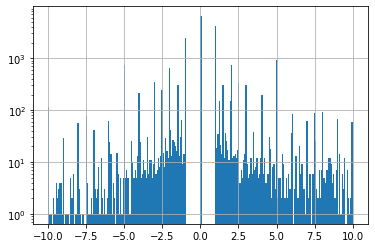

In [5]:
import matplotlib.pyplot as plt

df_['diff'].hist(bins=250)
plt.yscale('log')
plt.show()


In [6]:
from steps.transform import ImpactAggregator

ag_df = ImpactAggregator(True).transform(df_)
ag_df

,patch,date,champion,diff,buff,nerf
0,V12.5,2022-03-02,Ahri,-7.0,0.0,7.0
1,V12.5,2022-03-02,Caitlyn,0.0,0.0,0.0
2,V12.5,2022-03-02,Elise,0.0,0.0,0.0
3,V12.5,2022-03-02,Gwen,-6.0,0.0,6.0
4,V12.5,2022-03-02,Karthus,0.0,0.0,0.0
...,...,...,...,...,...,...
7336,"April 11, 2009 Patch",2009-04-11,Ryze,0.0,0.0,0.0
7337,"April 11, 2009 Patch",2009-04-11,Sion,-2.0,0.0,2.0
7338,"April 11, 2009 Patch",2009-04-11,Sivir,5.0,6.0,1.0
7339,"April 11, 2009 Patch",2009-04-11,Tristana,2.0,2.0,0.0


In [7]:
ImpactAggregator(False).transform(df_)

,patch,date,champion,diff,buff,nerf
0,"April 11, 2009 Patch",2009-04-11,Fiddlesticks,4.500000,4.500000,0.000000
1,"April 11, 2009 Patch",2009-04-11,Jax,-16.000000,0.000000,16.000000
2,"April 11, 2009 Patch",2009-04-11,Master Yi,2.000000,3.000000,1.000000
3,"April 11, 2009 Patch",2009-04-11,Morgana,22.833333,27.500000,4.666667
4,"April 11, 2009 Patch",2009-04-11,Nunu & Willump,3.000000,3.000000,0.000000
...,...,...,...,...,...,...
7336,V9.9,2019-05-01,Sylas,2.000000,2.000000,0.000000
7337,V9.9,2019-05-01,Tahm Kench,16.166667,29.166667,13.000000
7338,V9.9,2019-05-01,Taliyah,0.000000,0.000000,0.000000
7339,V9.9,2019-05-01,Volibear,6.500000,6.500000,0.000000


In [8]:
pd.set_option('display.max_colwidth', None)
df_[(df_['champion'] == 'Tahm Kench') & (df_['patch'] == 'V9.9')][['text', 'diff']]

,text,diff
5834,Base health increased to 600 from 540.,6.000000
5835,Health growth reduced to 100 from 102.,-2.000000
5836,Base movement speed increased to 345 from 335.,1.000000
5837,Bonus magic damage changed to 1.5% of his maximum health at all levels from 1.25 / 1.5 / 1.75% (based on level).,0.000000
5838,Slow duration increased to 2 seconds from 1.5.,5.000000
5839,Cooldown changed to 8 / 7 / 6 / 5 / 4 seconds from 5 at all ranks.,-1.000000
5840,Missile range increased to 900 units from 800.,1.000000
5841,Slow strength increased to 50 / 55 / 60 / 65 / 70% from 30 / 40 / 50 / 60 / 70%.,1.000000
5842,New Effect: Now slows for 95% and grounds Tahm Kench if he devours an allied champion.,1.000000
5843,New Effect: Now refunds 50% of its mana cost on devouring an enemy.,-1.000000
